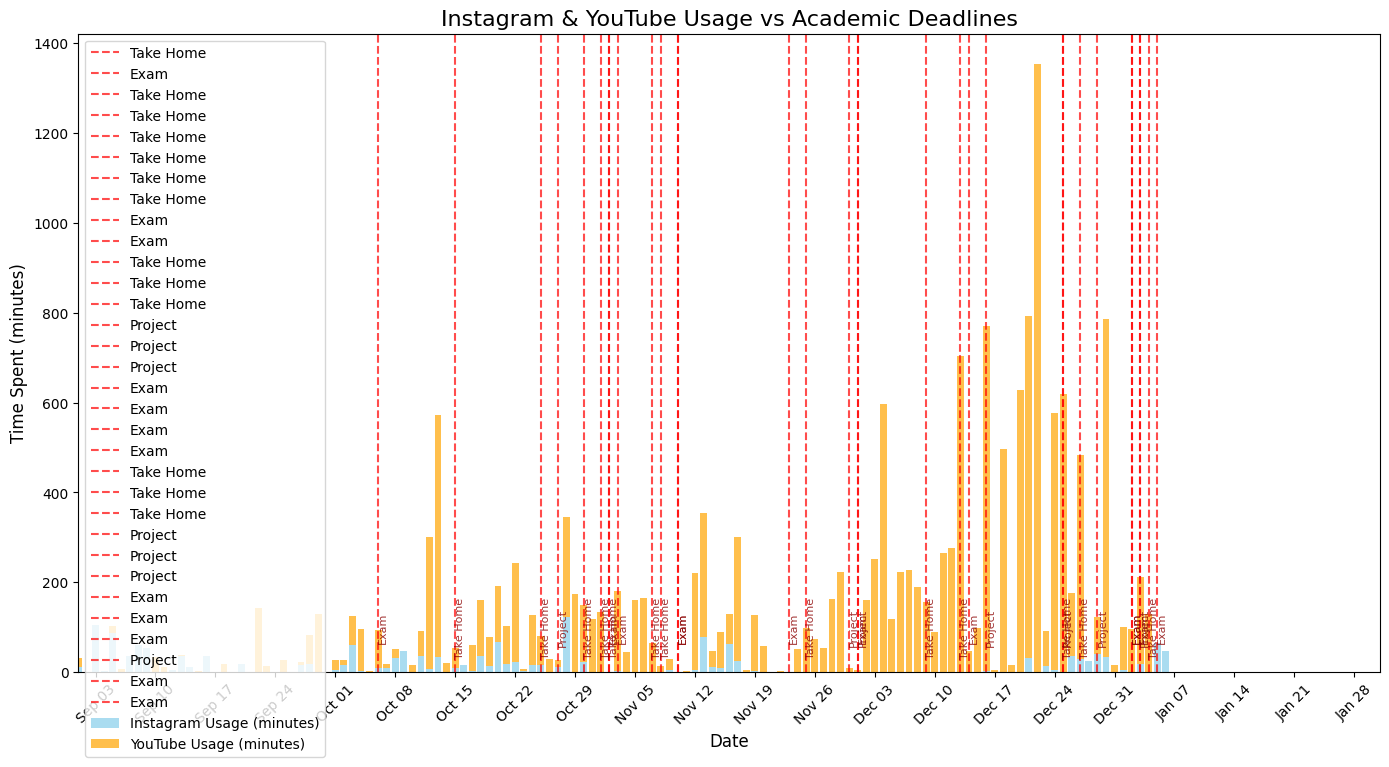

Combined plot saved to combined_usage_plot.png


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Load Instagram usage data
def load_instagram_usage(file_path):
    return pd.read_csv(file_path, parse_dates=["Date"]).set_index("Date")

# Load YouTube usage data
def load_youtube_usage(file_path):
    return pd.read_csv(file_path, parse_dates=["Date"]).set_index("Date")

# Load academic deadlines
def load_academic_deadlines(file_path):
    academic_data = pd.read_json(file_path)
    academic_data["date"] = pd.to_datetime(academic_data["date"])
    return academic_data

# Combine and plot data
def plot_combined_data(instagram_data, youtube_data, deadlines, output_file):
    # Align data by date
    combined_data = pd.concat([instagram_data, youtube_data], axis=1, join="outer")
    combined_data.columns = ["Instagram Usage (minutes)", "YouTube Usage (minutes)"]
    combined_data = combined_data.fillna(0)  # Fill missing usage with zeros

    # Filter data between September 2024 and January 2025
    start_date = datetime(2024, 9, 1)
    end_date = datetime(2025, 1, 31)
    combined_data = combined_data[(combined_data.index >= start_date) & (combined_data.index <= end_date)]

    # Set up the plot
    plt.figure(figsize=(14, 8))

    # Bar plots for Instagram and YouTube usage
    plt.bar(
        combined_data.index,
        combined_data["Instagram Usage (minutes)"],
        label="Instagram Usage (minutes)",
        color="skyblue",
        alpha=0.7
    )
    plt.bar(
        combined_data.index,
        combined_data["YouTube Usage (minutes)"],
        label="YouTube Usage (minutes)",
        color="orange",
        alpha=0.7,
        bottom=combined_data["Instagram Usage (minutes)"]  # Stack YouTube on Instagram
    )

    # Highlight academic deadlines
    for _, row in deadlines.iterrows():
        if start_date <= row["date"] <= end_date:
            plt.axvline(
                row["date"],
                color="red",
                linestyle="--",
                alpha=0.7,
                label=row["event_type"] if "event_type" in row else "Academic Deadline"
            )
            plt.text(
                row["date"],
                combined_data["Instagram Usage (minutes)"].max() * 0.8,
                row["event_type"] if "event_type" in row else "Deadline",
                rotation=90,
                verticalalignment="center",
                fontsize=8,
                color="darkred",
                alpha=0.8,
            )

    # Format the x-axis
    ax = plt.gca()
    ax.set_xlim([start_date, end_date])  # Limit x-axis to the desired range
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Weekly ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))  # Format dates as "Sep 01"
    plt.xticks(rotation=45, fontsize=10)

    # Add labels, title, and legend
    plt.title("Instagram & YouTube Usage vs Academic Deadlines", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Time Spent (minutes)", fontsize=12)
    plt.legend(loc="upper left")
    plt.tight_layout()

    # Save and display the plot
    plt.savefig(output_file, dpi=300)
    plt.show()
    print(f"Combined plot saved to {output_file}")

# Main function
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file
    output_plot = "combined_usage_plot.png"

    # Load data
    instagram_data = load_instagram_usage(instagram_file)
    youtube_data = load_youtube_usage(youtube_file)
    deadlines = load_academic_deadlines(deadlines_file)

    # Plot the combined data
    plot_combined_data(instagram_data, youtube_data, deadlines, output_plot)

if __name__ == "__main__":
    main()


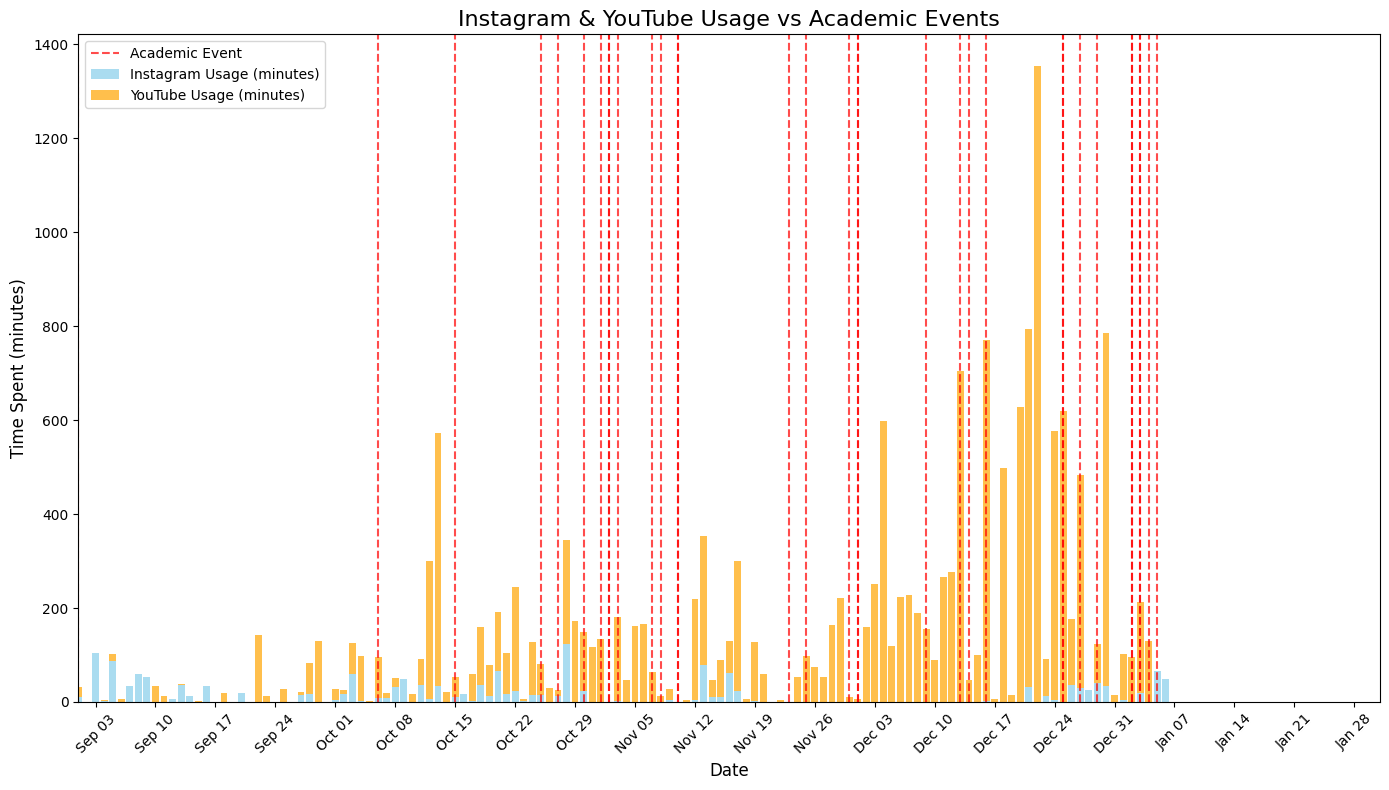

Combined plot saved to combined_usage_plot.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Load Instagram usage data
def load_instagram_usage(file_path):
    return pd.read_csv(file_path, parse_dates=["Date"]).set_index("Date")

# Load YouTube usage data
def load_youtube_usage(file_path):
    return pd.read_csv(file_path, parse_dates=["Date"]).set_index("Date")

# Load academic deadlines
def load_academic_deadlines(file_path):
    academic_data = pd.read_json(file_path)
    academic_data["date"] = pd.to_datetime(academic_data["date"])
    return academic_data

# Combine and plot data
def plot_combined_data(instagram_data, youtube_data, deadlines, output_file):
    # Align data by date
    combined_data = pd.concat([instagram_data, youtube_data], axis=1, join="outer")
    combined_data.columns = ["Instagram Usage (minutes)", "YouTube Usage (minutes)"]
    combined_data = combined_data.fillna(0)  # Fill missing usage with zeros

    # Filter data between September 2024 and January 2025
    start_date = datetime(2024, 9, 1)
    end_date = datetime(2025, 1, 31)
    combined_data = combined_data[(combined_data.index >= start_date) & (combined_data.index <= end_date)]

    # Set up the plot
    plt.figure(figsize=(14, 8))

    # Bar plots for Instagram and YouTube usage
    plt.bar(
        combined_data.index,
        combined_data["Instagram Usage (minutes)"],
        label="Instagram Usage (minutes)",
        color="skyblue",
        alpha=0.7
    )
    plt.bar(
        combined_data.index,
        combined_data["YouTube Usage (minutes)"],
        label="YouTube Usage (minutes)",
        color="orange",
        alpha=0.7,
        bottom=combined_data["Instagram Usage (minutes)"]  # Stack YouTube on Instagram
    )

    # Highlight academic deadlines
    for _, row in deadlines.iterrows():
        if start_date <= row["date"] <= end_date:
            plt.axvline(
                row["date"],
                color="red",
                linestyle="--",
                alpha=0.7
            )

    # Add a single legend entry for "Academic Event"
    plt.axvline(
        datetime(2024, 9, 1),  # Dummy line for the legend
        color="red",
        linestyle="--",
        alpha=0.7,
        label="Academic Event"
    )

    # Format the x-axis
    ax = plt.gca()
    ax.set_xlim([start_date, end_date])  # Limit x-axis to the desired range
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Weekly ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))  # Format dates as "Sep 01"
    plt.xticks(rotation=45, fontsize=10)

    # Add labels, title, and legend
    plt.title("Instagram & YouTube Usage vs Academic Events", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Time Spent (minutes)", fontsize=12)
    plt.legend(loc="upper left")
    plt.tight_layout()

    # Save and display the plot
    plt.savefig(output_file, dpi=300)
    plt.show()
    print(f"Combined plot saved to {output_file}")

# Main function
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file
    output_plot = "combined_usage_plot.png"

    # Load data
    instagram_data = load_instagram_usage(instagram_file)
    youtube_data = load_youtube_usage(youtube_file)
    deadlines = load_academic_deadlines(deadlines_file)

    # Plot the combined data
    plot_combined_data(instagram_data, youtube_data, deadlines, output_plot)

if __name__ == "__main__":
    main()



In [11]:
import numpy as np

def calculate_correlation(combined_data, deadlines):
    combined_data["days_to_deadline"] = np.inf  # Initialize as large values
    for _, row in deadlines.iterrows():
        combined_data["days_to_deadline"] = combined_data.index.map(
            lambda x: min(combined_data["days_to_deadline"].get(x, np.inf), abs((x - row["date"]).days))
        )

    instagram_corr = combined_data["Instagram Usage (minutes)"].corr(combined_data["days_to_deadline"])
    youtube_corr = combined_data["YouTube Usage (minutes)"].corr(combined_data["days_to_deadline"])

    print(f"Correlation with Instagram Usage: {instagram_corr}")
    print(f"Correlation with YouTube Usage: {youtube_corr}")

    return combined_data


In [12]:
def aggregate_usage_around_deadlines(combined_data, deadlines, window=7):
    usage_around_deadlines = []
    for _, row in deadlines.iterrows():
        deadline_date = row["date"]
        start_window = deadline_date - pd.Timedelta(days=window)
        end_window = deadline_date + pd.Timedelta(days=window)
        subset = combined_data[(combined_data.index >= start_window) & (combined_data.index <= end_window)]
        usage_around_deadlines.append({
            "deadline": deadline_date,
            "mean_instagram": subset["Instagram Usage (minutes)"].mean(),
            "mean_youtube": subset["YouTube Usage (minutes)"].mean(),
        })

    usage_df = pd.DataFrame(usage_around_deadlines)
    print(usage_df)
    return usage_df


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_usage_around_deadlines(usage_around_deadlines, output_file):
    sns.heatmap(
        usage_around_deadlines.pivot("deadline", "days_relative_to_deadline", "usage"),
        cmap="coolwarm",
        annot=True
    )
    plt.title("Usage Heatmap Around Deadlines")
    plt.xlabel("Days Relative to Deadline")
    plt.ylabel("Deadlines")
    plt.savefig(output_file)
    plt.show()


In [15]:
def plot_boxplots(combined_data, deadlines):
    combined_data["is_near_deadline"] = combined_data.index.map(
        lambda x: any(abs((x - row["date"]).days) <= 7 for _, row in deadlines.iterrows())
    )
    sns.boxplot(
        x="is_near_deadline",
        y="Instagram Usage (minutes)",
        data=combined_data.reset_index(),
        palette="Set3"
    )
    plt.title("Instagram Usage Near Deadlines vs Other Times")
    plt.show()


In [17]:
from sklearn.linear_model import LinearRegression

def perform_regression(combined_data):
    X = combined_data["days_to_deadline"].values.reshape(-1, 1)  # Predictor: Days to deadline
    y_instagram = combined_data["Instagram Usage (minutes)"].values  # Response: Instagram usage
    y_youtube = combined_data["YouTube Usage (minutes)"].values  # Response: YouTube usage

    model_instagram = LinearRegression().fit(X, y_instagram)
    model_youtube = LinearRegression().fit(X, y_youtube)

    print(f"Instagram Model Coefficients: {model_instagram.coef_}")
    print(f"YouTube Model Coefficients: {model_youtube.coef_}")


Correlation with Instagram Usage: 0.25899676266690486
Correlation with YouTube Usage: -0.2550740436731182
Correlation with Total Usage: -0.22629065585418354


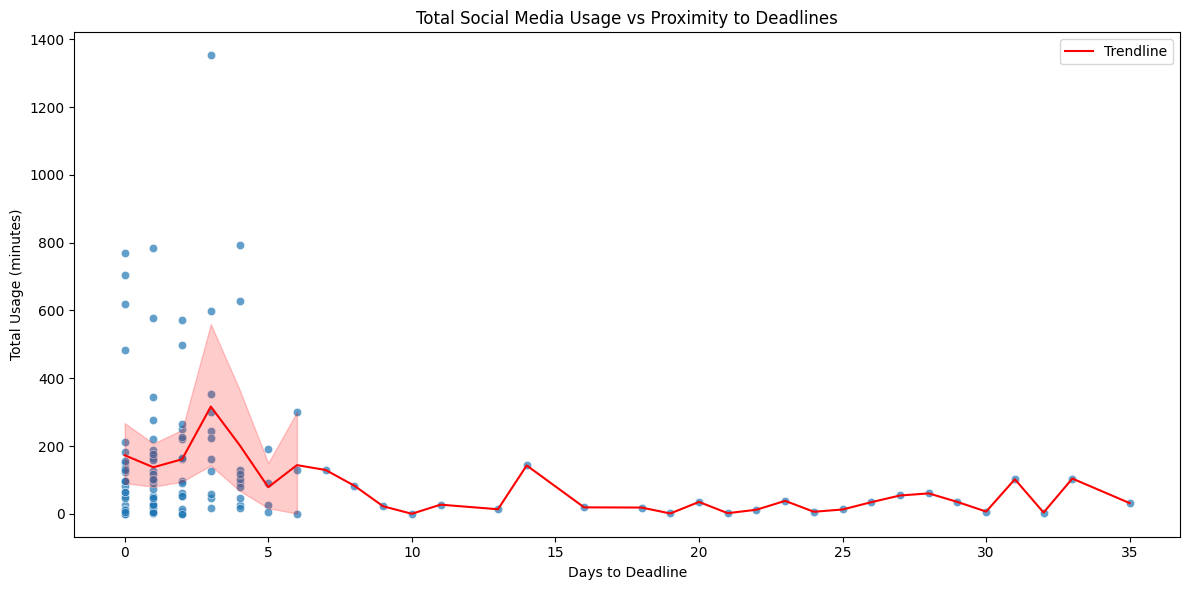

Intercept: 178.10066641024147
Coefficient: -5.387067567191409


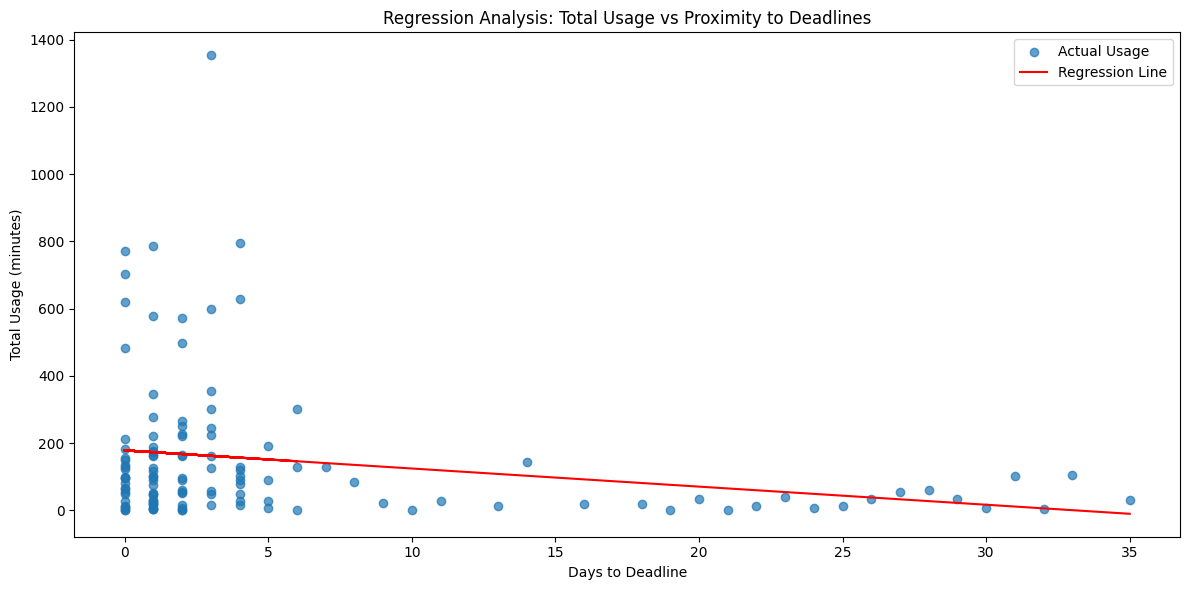

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression

# Load Instagram usage data
def load_instagram_usage(file_path):
    return pd.read_csv(file_path, parse_dates=["Date"]).set_index("Date")

# Load YouTube usage data
def load_youtube_usage(file_path):
    return pd.read_csv(file_path, parse_dates=["Date"]).set_index("Date")

# Load academic deadlines
def load_academic_deadlines(file_path):
    academic_data = pd.read_json(file_path)
    academic_data["date"] = pd.to_datetime(academic_data["date"])
    return academic_data

# Combine all data into a single DataFrame
def combine_data(instagram_file, youtube_file, deadlines_file):
    # Load Instagram and YouTube data
    instagram_data = load_instagram_usage(instagram_file)
    youtube_data = load_youtube_usage(youtube_file)

    # Combine usage data
    combined_data = pd.concat([instagram_data, youtube_data], axis=1, join="outer")
    combined_data.columns = ["Instagram Usage (minutes)", "YouTube Usage (minutes)"]
    combined_data = combined_data.fillna(0)  # Fill missing usage with zeros

    # Calculate total usage
    combined_data["Total Usage (minutes)"] = combined_data["Instagram Usage (minutes)"] + combined_data["YouTube Usage (minutes)"]

    # Add "days to deadline" column
    deadlines = load_academic_deadlines(deadlines_file)
    combined_data["Days to Deadline"] = np.inf
    for _, row in deadlines.iterrows():
        combined_data["Days to Deadline"] = combined_data.index.map(
            lambda x: min(combined_data["Days to Deadline"].get(x, np.inf), abs((x - row["date"]).days))
        )

    return combined_data, deadlines

# Analyze correlation
def calculate_correlation(combined_data):
    instagram_corr = combined_data["Instagram Usage (minutes)"].corr(combined_data["Days to Deadline"])
    youtube_corr = combined_data["YouTube Usage (minutes)"].corr(combined_data["Days to Deadline"])
    total_corr = combined_data["Total Usage (minutes)"].corr(combined_data["Days to Deadline"])
    print("Correlation with Instagram Usage:", instagram_corr)
    print("Correlation with YouTube Usage:", youtube_corr)
    print("Correlation with Total Usage:", total_corr)

# Plot scatter plot with trendline
def plot_usage_vs_deadlines(combined_data, deadlines, output_file):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        x="Days to Deadline",
        y="Total Usage (minutes)",
        data=combined_data,
        alpha=0.7
    )
    sns.lineplot(
        x="Days to Deadline",
        y="Total Usage (minutes)",
        data=combined_data,
        color="red",
        label="Trendline"
    )
    plt.title("Total Social Media Usage vs Proximity to Deadlines")
    plt.xlabel("Days to Deadline")
    plt.ylabel("Total Usage (minutes)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.show()

# Perform regression analysis
def perform_regression(combined_data):
    X = combined_data["Days to Deadline"].values.reshape(-1, 1)
    y = combined_data["Total Usage (minutes)"].values

    model = LinearRegression()
    model.fit(X, y)

    print("Intercept:", model.intercept_)
    print("Coefficient:", model.coef_[0])

    combined_data["Predicted Usage"] = model.predict(X)

    plt.figure(figsize=(12, 6))
    plt.scatter(combined_data["Days to Deadline"], combined_data["Total Usage (minutes)"], alpha=0.7, label="Actual Usage")
    plt.plot(combined_data["Days to Deadline"], combined_data["Predicted Usage"], color="red", label="Regression Line")
    plt.title("Regression Analysis: Total Usage vs Proximity to Deadlines")
    plt.xlabel("Days to Deadline")
    plt.ylabel("Total Usage (minutes)")
    plt.legend()
    plt.tight_layout()
    plt.savefig("regression_analysis.png", dpi=300)
    plt.show()

# Main function
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file

    # Combine data
    combined_data, deadlines = combine_data(instagram_file, youtube_file, deadlines_file)

    # Analyze correlation
    calculate_correlation(combined_data)

    # Plot usage vs deadlines
    plot_usage_vs_deadlines(combined_data, deadlines, "usage_vs_deadlines.png")

    # Perform regression analysis
    perform_regression(combined_data)

if __name__ == "__main__":
    main()


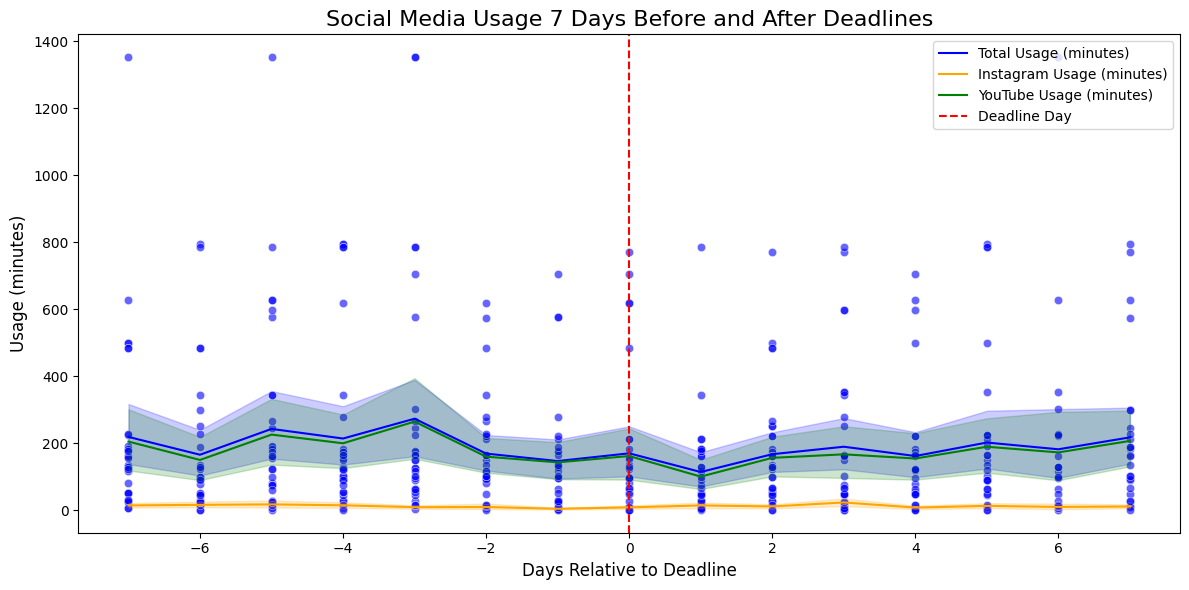

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter usage data within 7 days before and after deadlines
def filter_usage_around_deadlines(combined_data, deadlines, window=7):
    usage_around_deadlines = []

    for _, row in deadlines.iterrows():
        deadline_date = row["date"]
        start_window = deadline_date - pd.Timedelta(days=window)
        end_window = deadline_date + pd.Timedelta(days=window)

        # Subset combined data for this window
        subset = combined_data[(combined_data.index >= start_window) & (combined_data.index <= end_window)]
        for date, row_data in subset.iterrows():
            usage_around_deadlines.append({
                "deadline_date": deadline_date,
                "date": date,
                "days_relative_to_deadline": (date - deadline_date).days,
                "instagram_usage": row_data["Instagram Usage (minutes)"],
                "youtube_usage": row_data["YouTube Usage (minutes)"],
                "total_usage": row_data["Total Usage (minutes)"]
            })

    return pd.DataFrame(usage_around_deadlines)

# Plot usage around deadlines
def plot_usage_around_deadlines(usage_around_deadlines, output_file):
    plt.figure(figsize=(12, 6))

    # Plot Total Usage
    sns.lineplot(
        x="days_relative_to_deadline",
        y="total_usage",
        data=usage_around_deadlines,
        label="Total Usage (minutes)",
        color="blue"
    )
    sns.scatterplot(
        x="days_relative_to_deadline",
        y="total_usage",
        data=usage_around_deadlines,
        alpha=0.6,
        color="blue"
    )

    # Add Instagram and YouTube separately
    sns.lineplot(
        x="days_relative_to_deadline",
        y="instagram_usage",
        data=usage_around_deadlines,
        label="Instagram Usage (minutes)",
        color="orange"
    )
    sns.lineplot(
        x="days_relative_to_deadline",
        y="youtube_usage",
        data=usage_around_deadlines,
        label="YouTube Usage (minutes)",
        color="green"
    )

    # Plot formatting
    plt.title("Social Media Usage 7 Days Before and After Deadlines", fontsize=16)
    plt.xlabel("Days Relative to Deadline", fontsize=12)
    plt.ylabel("Usage (minutes)", fontsize=12)
    plt.axvline(x=0, color="red", linestyle="--", label="Deadline Day")
    plt.legend()
    plt.tight_layout()

    # Save and show plot
    plt.savefig(output_file, dpi=300)
    plt.show()

# Main function
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file
    output_plot = "usage_around_deadlines.png"

    # Load data
    combined_data, deadlines = combine_data(instagram_file, youtube_file, deadlines_file)

    # Filter usage around deadlines
    usage_around_deadlines = filter_usage_around_deadlines(combined_data, deadlines, window=7)

    # Plot usage around deadlines
    plot_usage_around_deadlines(usage_around_deadlines, output_plot)

if __name__ == "__main__":
    main()


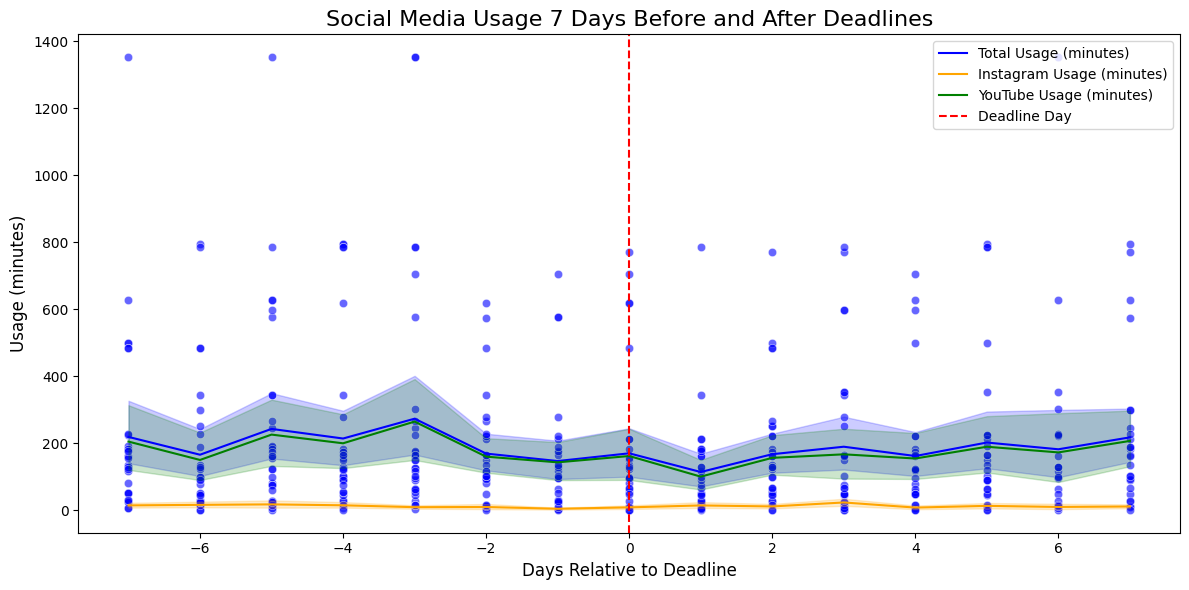

Intercept: 187.80318939512858
Coefficient: -2.4820592369776073


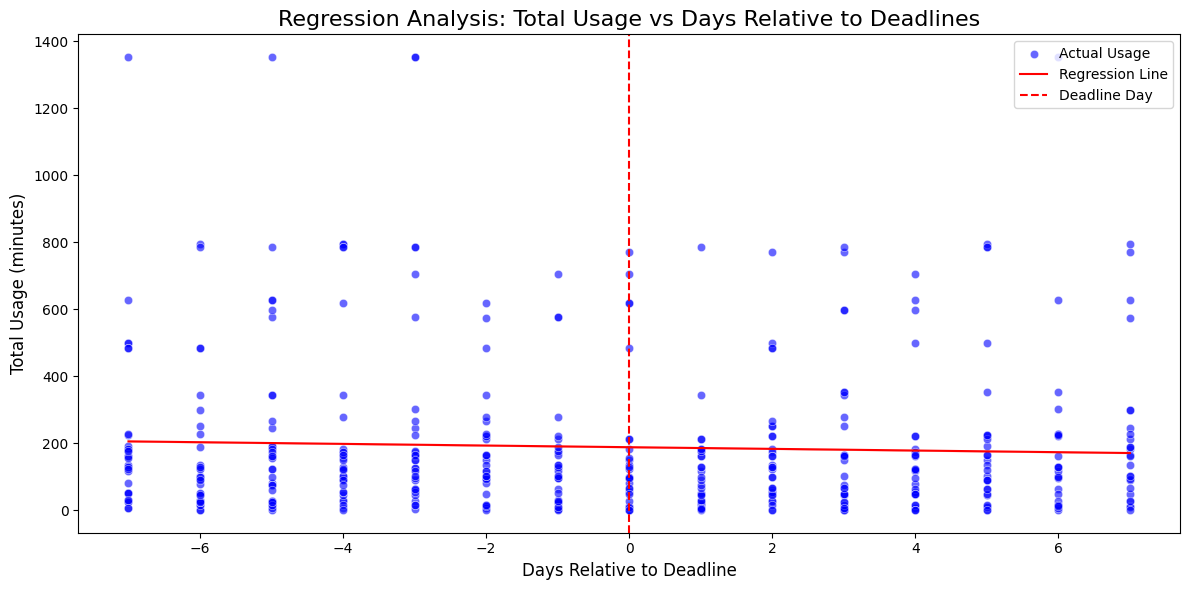

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter usage data within 7 days before and after deadlines
def filter_usage_around_deadlines(combined_data, deadlines, window=7):
    usage_around_deadlines = []

    for _, row in deadlines.iterrows():
        deadline_date = row["date"]
        start_window = deadline_date - pd.Timedelta(days=window)
        end_window = deadline_date + pd.Timedelta(days=window)

        # Subset combined data for this window
        subset = combined_data[(combined_data.index >= start_window) & (combined_data.index <= end_window)]
        for date, row_data in subset.iterrows():
            usage_around_deadlines.append({
                "deadline_date": deadline_date,
                "date": date,
                "days_relative_to_deadline": (date - deadline_date).days,
                "instagram_usage": row_data["Instagram Usage (minutes)"],
                "youtube_usage": row_data["YouTube Usage (minutes)"],
                "total_usage": row_data["Total Usage (minutes)"]
            })

    return pd.DataFrame(usage_around_deadlines)

# Plot usage around deadlines
def plot_usage_around_deadlines(usage_around_deadlines, output_file):
    plt.figure(figsize=(12, 6))

    # Plot Total Usage
    sns.lineplot(
        x="days_relative_to_deadline",
        y="total_usage",
        data=usage_around_deadlines,
        label="Total Usage (minutes)",
        color="blue"
    )
    sns.scatterplot(
        x="days_relative_to_deadline",
        y="total_usage",
        data=usage_around_deadlines,
        alpha=0.6,
        color="blue"
    )

    # Add Instagram and YouTube separately
    sns.lineplot(
        x="days_relative_to_deadline",
        y="instagram_usage",
        data=usage_around_deadlines,
        label="Instagram Usage (minutes)",
        color="orange"
    )
    sns.lineplot(
        x="days_relative_to_deadline",
        y="youtube_usage",
        data=usage_around_deadlines,
        label="YouTube Usage (minutes)",
        color="green"
    )

    # Plot formatting
    plt.title("Social Media Usage 7 Days Before and After Deadlines", fontsize=16)
    plt.xlabel("Days Relative to Deadline", fontsize=12)
    plt.ylabel("Usage (minutes)", fontsize=12)
    plt.axvline(x=0, color="red", linestyle="--", label="Deadline Day")
    plt.legend()
    plt.tight_layout()

    # Save and show plot
    plt.savefig(output_file, dpi=300)
    plt.show()

# Perform regression analysis
def regression_model(usage_around_deadlines):
    X = usage_around_deadlines["days_relative_to_deadline"].values.reshape(-1, 1)
    y = usage_around_deadlines["total_usage"].values

    # Fit regression model
    model = LinearRegression()
    model.fit(X, y)

    print("Intercept:", model.intercept_)
    print("Coefficient:", model.coef_[0])

    # Add predicted values to DataFrame
    usage_around_deadlines["predicted_usage"] = model.predict(X)

    # Plot regression
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        x="days_relative_to_deadline",
        y="total_usage",
        data=usage_around_deadlines,
        label="Actual Usage",
        alpha=0.6,
        color="blue"
    )
    sns.lineplot(
        x="days_relative_to_deadline",
        y="predicted_usage",
        data=usage_around_deadlines,
        label="Regression Line",
        color="red"
    )
    plt.title("Regression Analysis: Total Usage vs Days Relative to Deadlines", fontsize=16)
    plt.xlabel("Days Relative to Deadline", fontsize=12)
    plt.ylabel("Total Usage (minutes)", fontsize=12)
    plt.axvline(x=0, color="red", linestyle="--", label="Deadline Day")
    plt.legend()
    plt.tight_layout()
    plt.savefig("regression_usage_around_deadlines.png", dpi=300)
    plt.show()

# Main function
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file

    # Combine data
    combined_data, deadlines = combine_data(instagram_file, youtube_file, deadlines_file)

    # Filter usage around deadlines
    usage_around_deadlines = filter_usage_around_deadlines(combined_data, deadlines, window=7)

    # Plot usage around deadlines
    plot_usage_around_deadlines(usage_around_deadlines, "usage_around_deadlines.png")

    # Perform regression analysis
    regression_model(usage_around_deadlines)

if __name__ == "__main__":
    main()


Mean Squared Error: 53559.72
R-Squared: 0.01


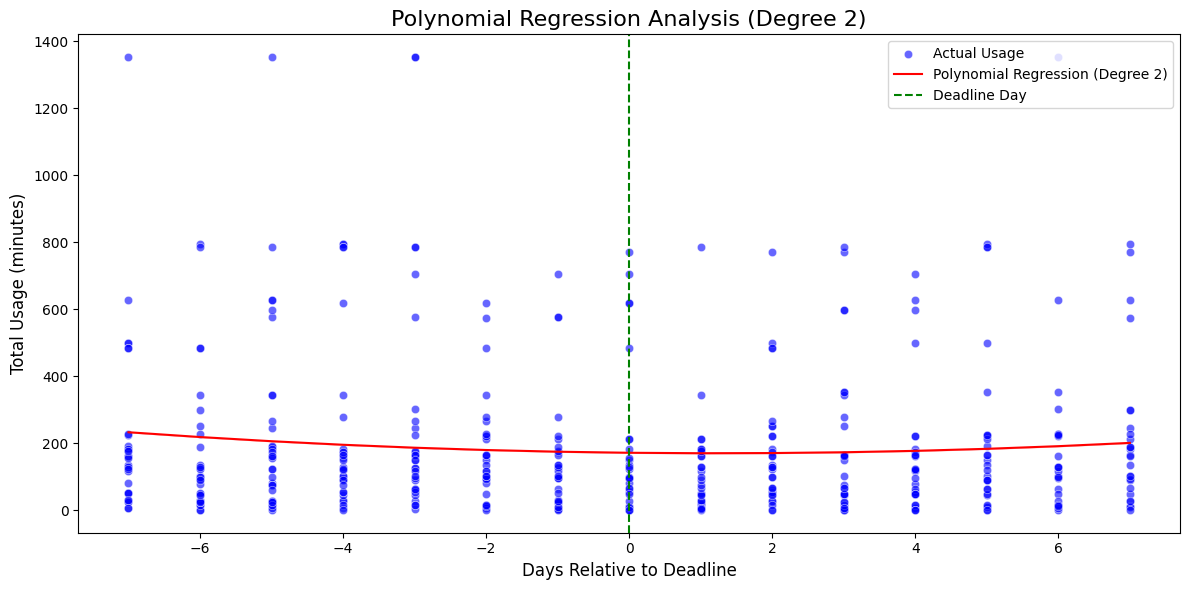

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Perform polynomial regression
def polynomial_regression(usage_around_deadlines, degree=2):
    X = usage_around_deadlines["days_relative_to_deadline"].values.reshape(-1, 1)
    y = usage_around_deadlines["total_usage"].values

    # Create a pipeline for polynomial regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)

    # Predict usage
    usage_around_deadlines["poly_predicted_usage"] = poly_model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, usage_around_deadlines["poly_predicted_usage"])
    r2 = r2_score(y, usage_around_deadlines["poly_predicted_usage"])
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-Squared: {r2:.2f}")

    # Plot actual vs predicted usage
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        x="days_relative_to_deadline",
        y="total_usage",
        data=usage_around_deadlines,
        label="Actual Usage",
        alpha=0.6,
        color="blue"
    )
    sns.lineplot(
        x="days_relative_to_deadline",
        y="poly_predicted_usage",
        data=usage_around_deadlines,
        label=f"Polynomial Regression (Degree {degree})",
        color="red"
    )
    plt.axvline(x=0, color="green", linestyle="--", label="Deadline Day")
    plt.title(f"Polynomial Regression Analysis (Degree {degree})", fontsize=16)
    plt.xlabel("Days Relative to Deadline", fontsize=12)
    plt.ylabel("Total Usage (minutes)", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig("polynomial_regression_usage.png", dpi=300)
    plt.show()

# Main function
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file

    # Combine data
    combined_data, deadlines = combine_data(instagram_file, youtube_file, deadlines_file)

    # Filter usage around deadlines
    usage_around_deadlines = filter_usage_around_deadlines(combined_data, deadlines, window=7)

    # Perform polynomial regression
    polynomial_regression(usage_around_deadlines, degree=2)

if __name__ == "__main__":
    main()


In [24]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Perform statistical significance test
def test_statistical_significance(usage_around_deadlines):
    X = usage_around_deadlines["days_relative_to_deadline"].values.reshape(-1, 1)
    y = usage_around_deadlines["total_usage"].values

    # Add a constant term for the intercept
    X_with_constant = sm.add_constant(X)

    # Fit the regression model using statsmodels
    model = sm.OLS(y, X_with_constant).fit()

    # Print the summary of the regression
    print(model.summary())

# Main function
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file

    # Combine data
    combined_data, deadlines = combine_data(instagram_file, youtube_file, deadlines_file)

    # Filter usage around deadlines
    usage_around_deadlines = filter_usage_around_deadlines(combined_data, deadlines, window=7)

    # Test statistical significance
    test_statistical_significance(usage_around_deadlines)

if __name__ == "__main__":
    main()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9390
Date:                Fri, 10 Jan 2025   Prob (F-statistic):              0.333
Time:                        22:10:17   Log-Likelihood:                -3144.3
No. Observations:                 458   AIC:                             6293.
Df Residuals:                     456   BIC:                             6301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        187.8032     10.875     17.269      0.0

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

# Step 1: Normalize the data
def normalize_data(data):
    normalized_data = (data - data.min()) / (data.max() - data.min())
    return normalized_data

# Step 2: Calculate Chi-Square statistic
def chi_square_test(usage_around_deadlines, alpha=0.05):
    # Group data by days relative to the deadline
    observed = usage_around_deadlines.groupby("days_relative_to_deadline")["total_usage"].sum()

    # Normalize observed values
    observed_normalized = normalize_data(observed)

    # Calculate expected values (uniform distribution)
    expected = np.full_like(observed_normalized, observed_normalized.mean())

    # Calculate Chi-Square statistic
    chi_square_stat = np.sum((observed_normalized - expected) ** 2 / expected)

    # Degrees of freedom
    df = len(observed_normalized) - 1

    # Calculate critical value and p-value
    critical_value = chi2.ppf(1 - alpha, df)
    p_value = 1 - chi2.cdf(chi_square_stat, df)

    # Print results
    print(f"Chi-Square Statistic: {chi_square_stat:.4f}")
    print(f"Critical Value (0.05 significance): {critical_value:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Decision
    if chi_square_stat > critical_value:
        print("Reject H0: Social media usage is related to deadlines.")
    else:
        print("Fail to Reject H0: No significant relationship between usage and deadlines.")

# Step 3: Main function to run the test
def main():
    instagram_file = "daily_instagram_usage.csv"  # Replace with your Instagram usage CSV file
    youtube_file = "daily_watch_time.csv"  # Replace with your YouTube usage CSV file
    deadlines_file = "academic_deadlines.json"  # Replace with your academic deadlines JSON file

    # Combine data
    combined_data, deadlines = combine_data(instagram_file, youtube_file, deadlines_file)

    # Filter usage around deadlines
    usage_around_deadlines = filter_usage_around_deadlines(combined_data, deadlines, window=7)

    # Perform Chi-Square test
    chi_square_test(usage_around_deadlines)

if __name__ == "__main__":
    main()


Chi-Square Statistic: 2.1906
Critical Value (0.05 significance): 23.6848
P-value: 0.9999
Fail to Reject H0: No significant relationship between usage and deadlines.
